# Homework 2

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('laptops.csv')
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [3]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


## Exploratory Data Analysis

In [4]:
df.dtypes

laptop           object
status           object
brand            object
model            object
cpu              object
ram               int64
storage           int64
storage_type     object
gpu              object
screen          float64
touch            object
final_price     float64
dtype: object

In [5]:
base = ['ram', 'storage', 'screen', 'final_price']

In [6]:
df_base = df[base]

In [7]:
for col in base:
    print(col)
    print(df_base[col].unique()[:5])
    print(df_base[col].nunique())
    print()

ram
[ 8 16 32 12  4]
9

storage
[ 512  256 1000   64  128]
12

screen
[15.6 17.3 14.  16.1 13.3]
29

final_price
[1009.    299.    789.   1199.    669.01]
1440



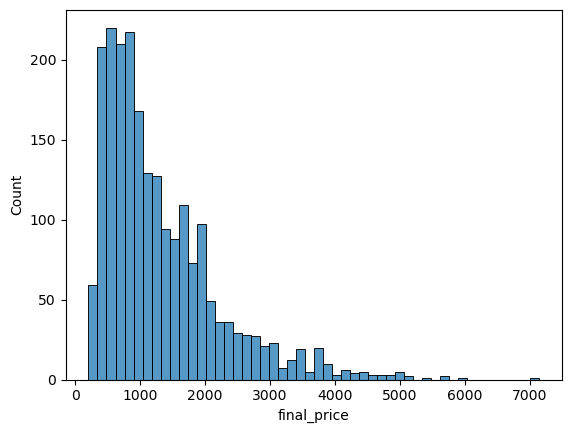

In [8]:
_ = sns.histplot(df_base.final_price, bins = 50)

## Question 1. Missing values

In [9]:
df_base.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

In [10]:
df_base.describe()

,ram,storage,screen,final_price
count,2160.000000,2160.000000,2156.000000,2160.000000
mean,15.413889,596.294444,15.168112,1312.638509
std,9.867815,361.220506,1.203329,911.475417
min,4.000000,0.000000,10.100000,201.050000
25%,8.000000,256.000000,14.000000,661.082500
50%,16.000000,512.000000,15.600000,1031.945000
75%,16.000000,1000.000000,15.600000,1708.970000
max,128.000000,4000.000000,18.000000,7150.470000


## Question 2. Median for RAM

In [11]:
df_base.ram.median()

16.0

## Prepare and split the dataset

In [12]:
n = len(df_base)
n

2160

In [13]:
n_test = int(n*0.2)
n_val = int(n*0.2)
n_train = n - n_test - n_val
n, n_val + n_test + n_train

(2160, 2160)

schuffling in order to break any order

In [14]:
idx = np.arange(n)
idx

array([   0,    1,    2, ..., 2157, 2158, 2159])

In [15]:
np.random.seed(42)
np.random.shuffle(idx)
idx

array([2079,  668, 2073, ..., 1130, 1294,  860])

In [16]:
df_train = df_base.iloc[idx[:n_train]]
df_val = df_base.iloc[idx[n_train: n_train + n_val]]
df_test = df_base.iloc[idx[n_train+n_val:]]
len(df_base), len(df_train) + len(df_val) + len(df_test)

(2160, 2160)

In [17]:
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

In [18]:
y_train = df_train.final_price
y_val = df_val.final_price
y_test = df_test.final_price

In [19]:
del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

## Question 3. Filling NAs

### baseline model 1: filling missing values with 0

In [20]:
df_train1 = df_train.copy()

In [21]:
df_train1.columns

Index(['ram', 'storage', 'screen'], dtype='object')

In [22]:
df_train1.isnull().sum()

ram        0
storage    0
screen     3
dtype: int64

In [23]:
df_train1.fillna(0).isnull().sum()

ram        0
storage    0
screen     0
dtype: int64

In [24]:
X_train = df_train1.fillna(0).values

In [25]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X) # gram matrix
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)


    return w_full[0], w_full[1:]

In [26]:
def rmse(y, y_pred):
    se = (y - y_pred)**2
    mse = se.mean()
    return np.sqrt(mse)

In [27]:
w0, w = train_linear_regression(X_train, y_train)

In [28]:
y_pred = w0 + X_train.dot(w)

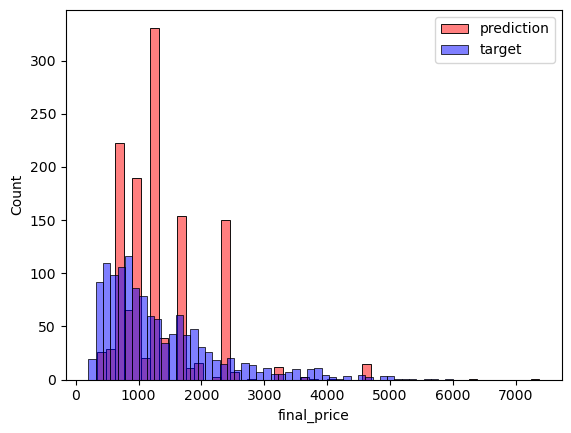

In [29]:
sns.histplot(y_pred, color = 'red', alpha = 0.5, bins = 50, label = 'prediction')
sns.histplot(y_train, color = 'blue', alpha = 0.5, bins = 50, label = 'target')
plt.legend()
plt.show()

In [30]:
score1 = round(rmse(y_train, y_pred), 2)
score1

602.39

### baseline model 2: filling missing values with mean

In [31]:
df_train_2 = df_train.copy()

In [32]:
df_train_2.isnull().sum()

ram        0
storage    0
screen     3
dtype: int64

In [33]:
df_train_2['screen'] = df_train_2['screen'].fillna(df_train_2['screen'].mean())
df_train_2.isnull().sum()

ram        0
storage    0
screen     0
dtype: int64

In [34]:
X_train_2 = df_train_2.values

In [35]:
w0, w = train_linear_regression(X_train_2, y_train)

In [36]:
y_pred_2 = w0 + X_train_2.dot(w)

In [37]:
score2 = round(rmse(y_train, y_pred_2), 2)
score2

602.18

## Question 4. Regularization

In [38]:
def train_linear_regression_reg(X, y, r = 0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r*np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)


    return w_full[0], w_full[1:]

In [39]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:

    X_train = df_train.fillna(0).values
    w0, w = train_linear_regression_reg(X_train, y_train, r = r)
    
    X_val =  df_val.fillna(0).values
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    print(r, round(score,2))

0 597.36
0.01 597.36
0.1 597.35
1 597.21
5 597.01
10 597.06
100 597.9


## Question 5. RMSE spread

In [40]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
scores = []

for seed in seeds:
    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)
    df_train = df_base.iloc[idx[:n_train]]
    df_val = df_base.iloc[idx[n_train: n_train + n_val]]
    df_test = df_base.iloc[idx[n_train+n_val:]]
    
    df_train = df_train.reset_index(drop = True)
    df_val = df_val.reset_index(drop = True)
    df_test = df_test.reset_index(drop = True)
    
    y_train = df_train.final_price
    y_val = df_val.final_price
    y_test = df_test.final_price
    
    del df_train['final_price']
    del df_val['final_price']
    del df_test['final_price']
    X_train = df_train.fillna(0).values
    w0, w = train_linear_regression(X_train, y_train)
    
    X_val =  df_val.fillna(0).values
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    scores.append(score)
    print(seed, round(score,2))

std_scores = np.std(scores)
print(f'The standard deviation of the scores are: {round(std_scores, 3)}')

0 565.45
1 636.8
2 588.96
3 597.81
4 571.96
5 573.24
6 647.34
7 550.44
8 587.33
9 576.1
The standard deviation of the scores are: 29.176


## Question 6. RMSE on Test

In [41]:
idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)

In [42]:
df_base = df[base]
df_train = df_base.iloc[idx[:n_train]]
df_val = df_base.iloc[idx[n_train: n_train + n_val]]
df_test = df_base.iloc[idx[n_train+n_val:]]

In [43]:
y_train = df_train.final_price
y_val = df_val.final_price
y_test = df_test.final_price

del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

In [44]:
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

In [45]:
X_full_train = df_full_train.fillna(0).values

In [46]:
y_full_train = np.concatenate([y_train, y_val])

In [47]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r = 0.001)

In [48]:
X_test = df_test.fillna(0).values
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

608.6099822049689